# Cell pose example

In [28]:
%matplotlib widget
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import tifffile
import pandas as pd
from pathlib import Path


In [59]:
from ipyfilechooser import FileChooser
fc = FileChooser('/home')
display(fc)
print(fc.selected)

FileChooser(path='/home', filename='', title='', show_hidden=False, select_desc='Select', change_desc='Change'…

None


In [29]:
# load the file list
path = Path('/media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/')
filelist = pd.read_csv(path/'filelist.csv')
filelist['Filename'][1]


'BICD2/U2OS As Z Positions BICD2 WGA_serie_0002MIP.tif'

In [45]:
filelist

,id,Condition,Filename,Channel Names,Unnamed: 4,ROI Channel,Object Channel,Mask Channel
0,1,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0001...,"DAPI,WGA,BICD2,G3BP1",NaN,1,4,2
1,2,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0002...,"DAPI,WGA,BICD2,G3BP1",NaN,1,4,2
2,3,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0003...,"DAPI,WGA,BICD2,G3BP1",NaN,1,4,2
3,4,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0004...,"DAPI,WGA,BICD2,G3BP1",NaN,1,4,2
4,5,BICD2,BICD2/U2OS As Z Positions BICD2 WGA_serie_0005...,"DAPI,WGA,BICD2,G3BP1",NaN,1,4,2
5,6,CAPRIN,CAPRIN/U2OS As Z CAPRIN Positions CAPRIN WGA_s...,"DAPI,WGA,CAPRIN,G3BP1",NaN,1,4,2
6,7,CAPRIN,CAPRIN/U2OS As Z CAPRIN Positions CAPRIN WGA_s...,"DAPI,WGA,CAPRIN,G3BP1",NaN,1,4,2
7,8,CAPRIN,CAPRIN/U2OS As Z CAPRIN Positions CAPRIN WGA_s...,"DAPI,WGA,CAPRIN,G3BP1",NaN,1,4,2
8,9,CAPRIN,CAPRIN/U2OS As Z CAPRIN Positions CAPRIN WGA_s...,"DAPI,WGA,CAPRIN,G3BP1",NaN,1,4,2
9,10,CAPRIN,CAPRIN/U2OS As Z CAPRIN Positions CAPRIN WGA_s...,"DAPI,WGA,CAPRIN,G3BP1",NaN,1,4,2


loading file /media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/BICD2/U2OS As Z Positions BICD2 WGA_serie_0002MIP.tif


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
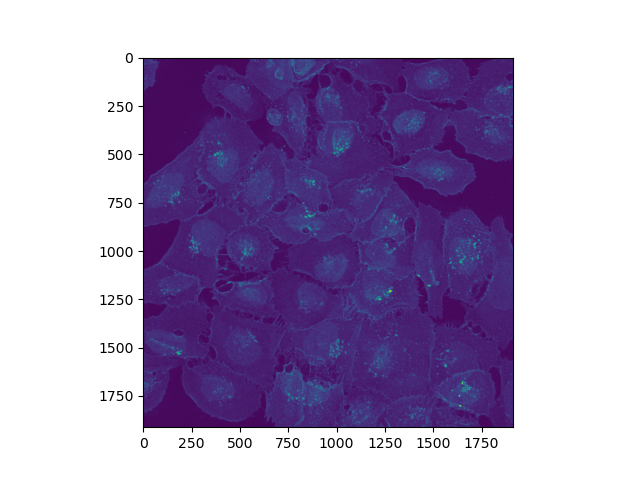

In [30]:
#fn = fc.selected
#fn = "/media/micro-nas-1/Bullock lab/Yaiza and Lucas Stress Granule images/Positions/series/BICD2/U2OS As Z Positions BICD2 WGA_serie_0001MIP.tif"
fn = path / filelist['Filename'][1] 
channels = filelist['Channel Names'][1] 
print(f'loading file {fn}')
img = tifffile.imread(fn)
img = img/np.max(img)
img.shape
plt.imshow(img[1,:,:])

2021-10-20 11:25:59,809 [INFO] ** TORCH CUDA version installed and working. **
2021-10-20 11:25:59,810 [INFO] >>>> using GPU


2021-10-20 10:36:27,840 [INFO] WRITING LOG OUTPUT TO /home/jeromeb/.cellpose/run.log
2021-10-20 10:36:30,636 [INFO] ** TORCH CUDA version installed and working. **
2021-10-20 10:36:30,637 [INFO] >>>> using GPU
2021-10-20 10:36:31,049 [INFO] ** TORCH CUDA version installed and working. **
2021-10-20 10:36:31,049 [INFO] >>>> using GPU
2021-10-20 10:36:31,490 [INFO] ~~~ FINDING MASKS ~~~


/home/jeromeb/miniconda3/envs/cellmask/lib/python3.9/site-packages/torch/nn/functional.py:3981: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


2021-10-20 10:36:34,513 [INFO] >>>> TOTAL TIME 3.02 sec
2021-10-20 10:36:34,514 [INFO] ~~~ FINDING MASKS ~~~
2021-10-20 10:36:37,809 [INFO] >>>> TOTAL TIME 3.30 sec


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
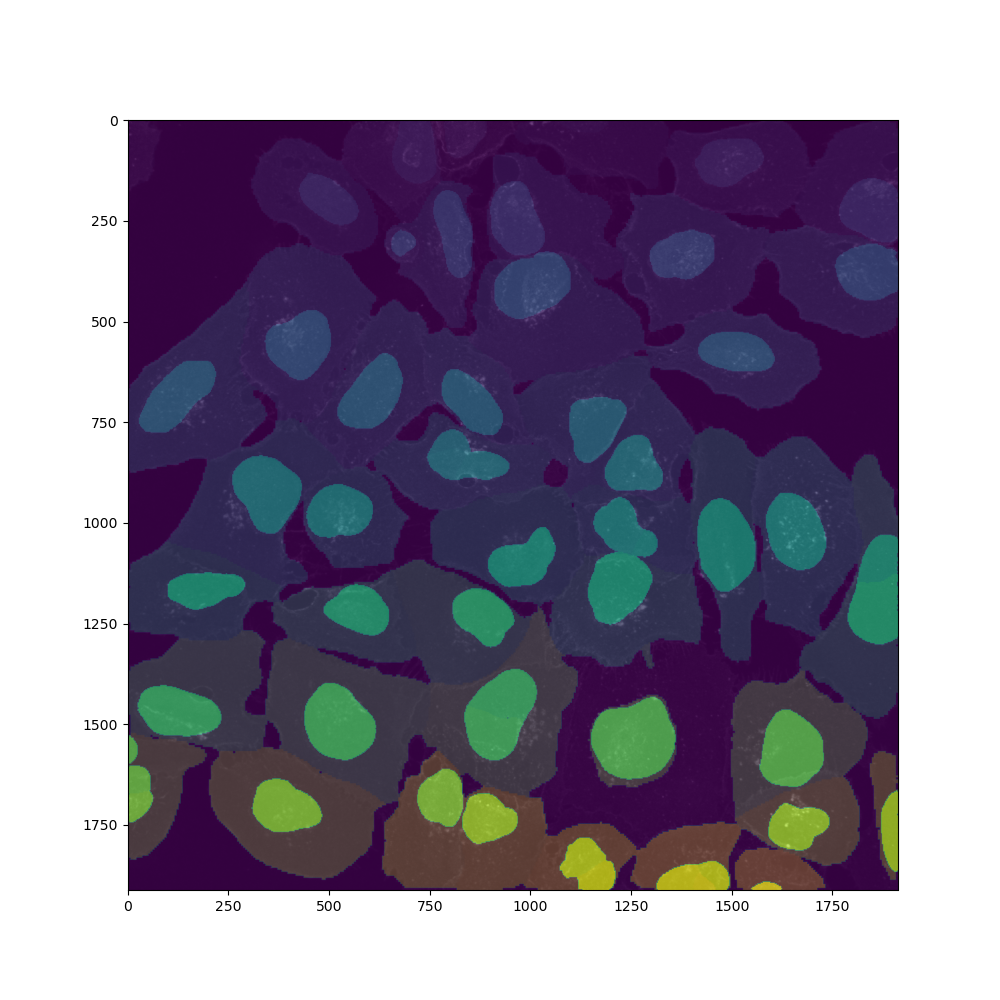

In [4]:
from cellpose import models

cyto_model = models.Cellpose(gpu=True, model_type='cyto2')
nuclei_model = models.Cellpose(gpu=True, model_type='nuclei')
cmask, flows, styles, diams = cyto_model.eval(img-100, diameter=150, flow_threshold=None, channels=[0,2])
nmask, flows, styles, diams = cyto_model.eval(img[0,:,:],diameter=80, flow_threshold=None, channels=[0,0])

plt.figure(figsize=(10,10))
plt.imshow(img[1,:,:],'gray')
plt.imshow(cmask,alpha=0.5)
plt.imshow(nmask,alpha=0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
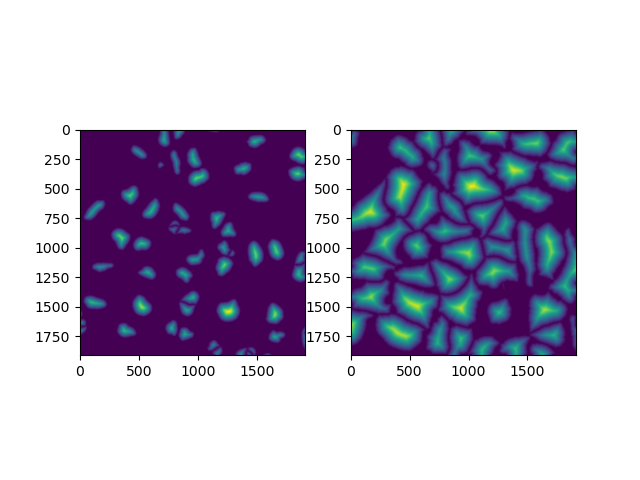

In [5]:
# compute the distance map in cells
import edt
cell_edt = edt.edt(cmask)
nuclei_edt = edt.edt(nmask,black_border=False)
fig, ax = plt.subplots(1,2)
ax[0].imshow(nuclei_edt)
ax[1].imshow(cell_edt)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
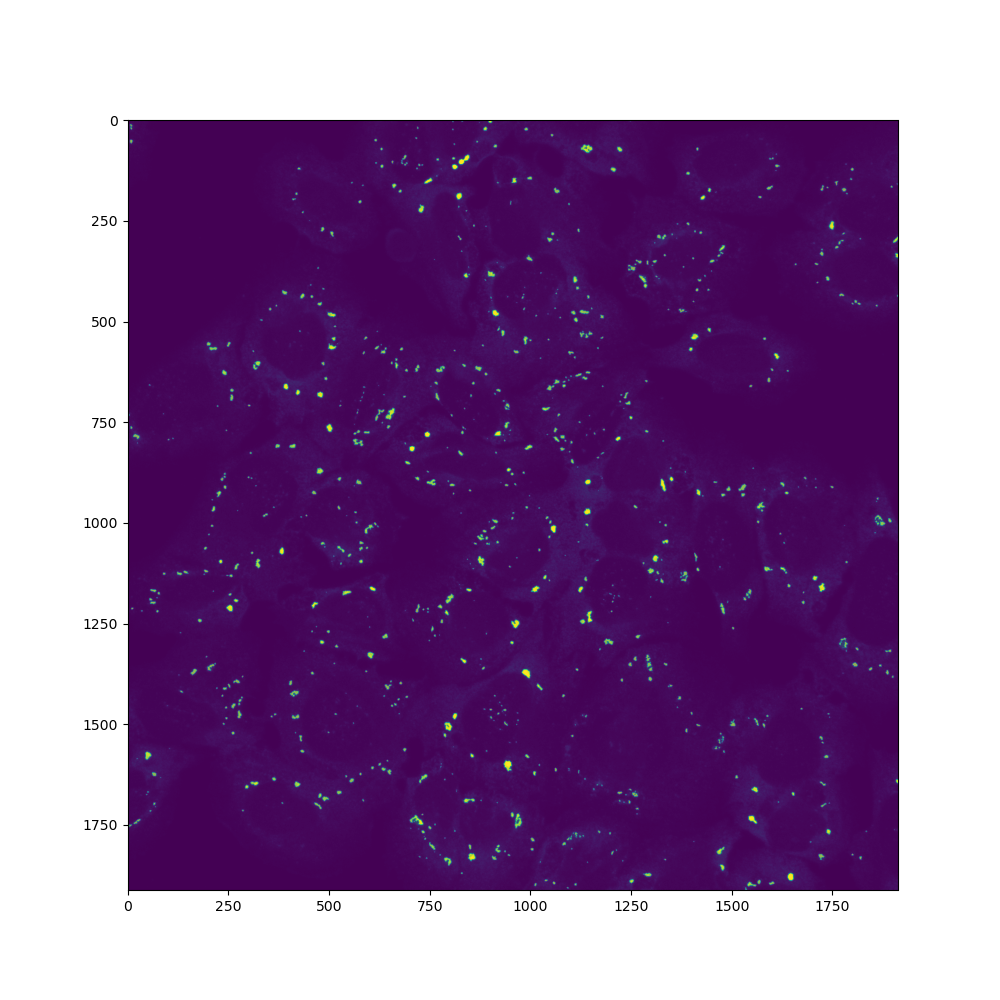

In [34]:
# Segment granules

from skimage.filters import difference_of_gaussians
from skimage.measure import label, regionprops

flt = difference_of_gaussians(img[3,:,:], 1, 4)
t = flt.mean() + 3*flt.std()

plt.figure(figsize=(10,10))

plt.imshow(img[3,:,:])
plt.imshow(flt>t,alpha=0.5)


In [27]:
import numpy as np
from scipy import ndimage
from skimage.filters import difference_of_gaussians
from skimage.measure import label, regionprops
import pandas as pd

# for each cell
cells = regionprops(cmask)
tbl_obj = []
tbl_roi = []
for cell in cells:
    id = cell.label
    
    # nuclei for this cell    
    mask = (cmask == id) * (nmask > 0)
    # compute signed distance
    inner_distance = edt.edt(mask) * (cmask == id)
    outer_distance = edt.edt(1 - mask)  * (cmask == id)    

    granules = label(mask*(flt>t), background=0)

    # measure granule distances in the granules
    regions = regionprops(granules, outer_distance - inner_distance)
    distance = [x.mean_intensity for x in regions] # or use min_intensity?

    # measure regions in the granules
    regions = regionprops(granules, img[3,:,:])
    num = len(regions)
    area = [x.area for x in regions]
    mean = [x.mean_intensity for x in regions]
    

    tbl_roi.append(pd.DataFrame.from_dict({'Area':cell.area,'Num':len(regions)}, orient='index'))
    tbl_obj.append(pd.DataFrame.from_dict({'Area':area,'Granule Mean Intensity':mean,'Cell ID':id, 'Distance to Nuclei':distance}))

tbl_obj = pd.concat(tbl_obj)
tbl_roi = pd.concat(tbl_roi)

    


/tmp/ipykernel_22729/2355026373.py:18: RuntimeWarning: invalid value encountered in multiply
  outer_distance = edt.edt(1 - mask)  * (cmask == id)


In [37]:

from numpy import linalg as LA

M = np.array([[2,0],[0,2]])
LA.eig(M)

(array([2., 2.]),
 array([[1., 0.],
        [0., 1.]]))